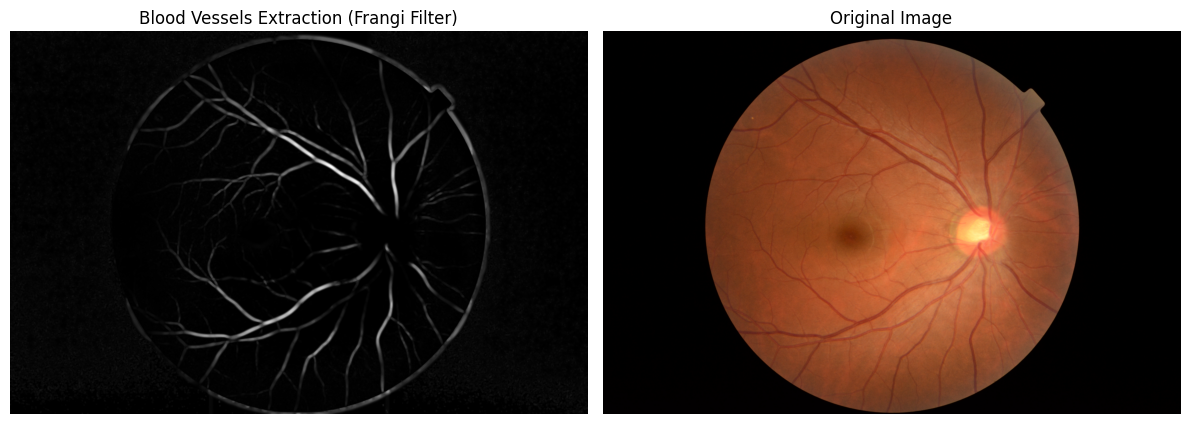

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import frangi
from skimage import exposure

image_path = "H:\\min_proj_dataset\\normal\\NL_002.png"
image = cv2.imread(image_path)

gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_image)
enhanced_image = exposure.equalize_hist(clahe_image)

blood_vessels = frangi(enhanced_image)
kernel = np.ones((3, 3), np.uint8)
edges = cv2.dilate(blood_vessels, kernel, iterations=2)
plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
plt.imshow(edges, cmap='gray')
plt.title('Blood Vessels Extraction (Frangi Filter)')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()

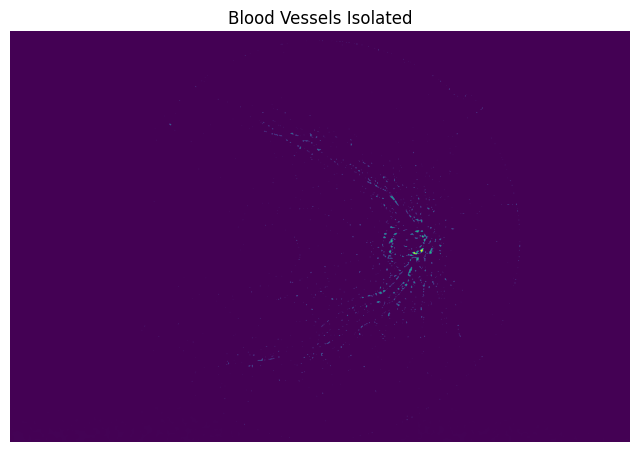

In [ ]:
# Convert the original grayscale image to RGB for visualization
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Create a mask from the edges
mask = edges.copy()
mask[mask > 0] = 255  # Set non-zero values to 255 (white)
mask = mask.astype(np.uint8)
# Invert the mask
mask = cv2.bitwise_not(mask)
#mask = mask.astype(np.uint8)
# Apply the mask to the original grayscale image
result_image = cv2.bitwise_and(gray_image, gray_image, mask=mask)

# Plot the result
plt.figure(figsize=(8, 6))
plt.imshow(result_image)
plt.title('Blood Vessels Isolated')
plt.axis('off')
plt.show()


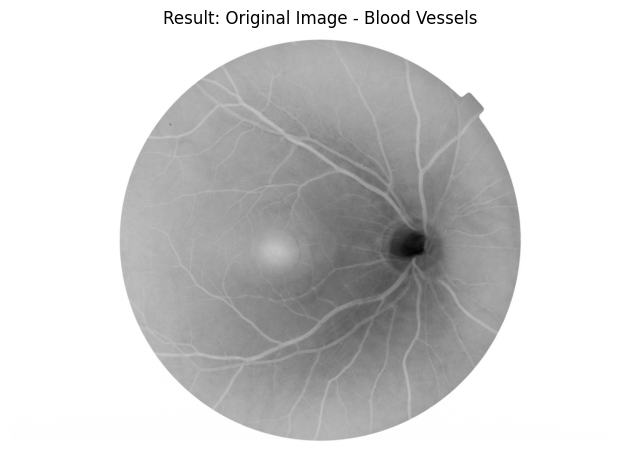

In [ ]:
# Convert edges to the same data type as the grayscale image
edges = edges.astype(np.uint8)

# Subtract edges from the original image
result_image = cv2.subtract(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), edges)

# Invert the result
result_image = cv2.bitwise_not(result_image)

# Plot the result
plt.figure(figsize=(8, 6))
plt.imshow(result_image, cmap='gray')
plt.title('Result: Original Image - Blood Vessels')
plt.axis('off')
plt.show()


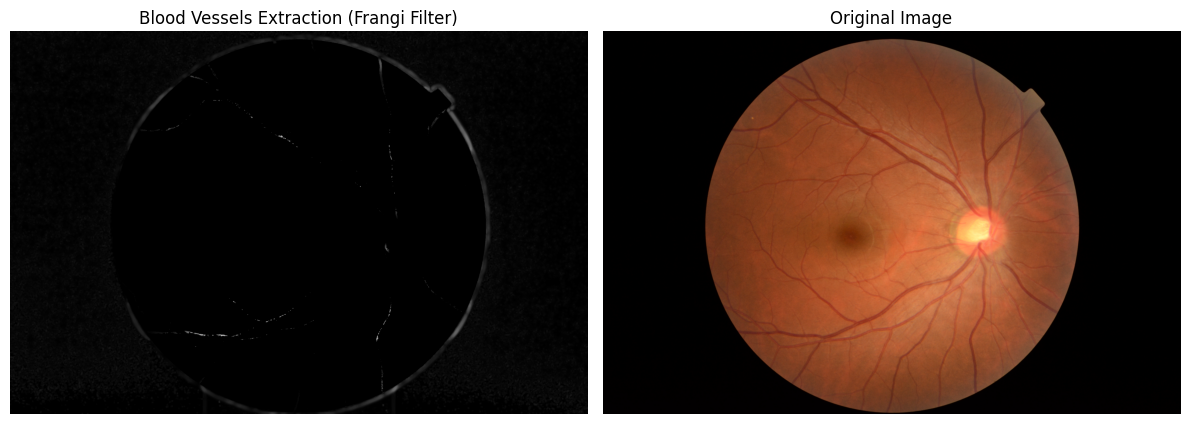

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import frangi
from skimage import exposure

image_path = "H:\\min_proj_dataset\\normal\\NL_002.png"
input_image = cv2.imread(image_path)

hsv_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2HSV)
lower_orange = np.array([5, 100, 100], dtype=np.uint8)
upper_orange = np.array([15, 255, 255], dtype=np.uint8)
orange_mask = cv2.inRange(hsv_input_image, lower_orange, upper_orange)

gray_input_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
clahe_image = clahe.apply(gray_input_image)

enhanced_image = exposure.equalize_hist(clahe_image)
vesselness_image = frangi(enhanced_image)
kernel = np.ones((3, 3), np.uint8)
dilated_vessels = cv2.dilate(vesselness_image, kernel, iterations=2)

vessels_without_eye = np.copy(dilated_vessels)
vessels_without_eye[orange_mask > 0] = 0

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.imshow(vessels_without_eye, cmap='gray')
plt.title('Blood Vessels Extraction (Frangi Filter)')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.tight_layout()
plt.show()


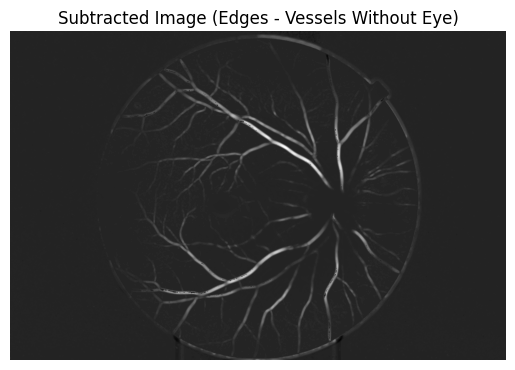

In [ ]:
subtracted_image = edges - vessels_without_eye

plt.imshow(subtracted_image, cmap='gray')
plt.title('Subtracted Image (Edges - Vessels Without Eye)')
plt.axis('off')
plt.show()


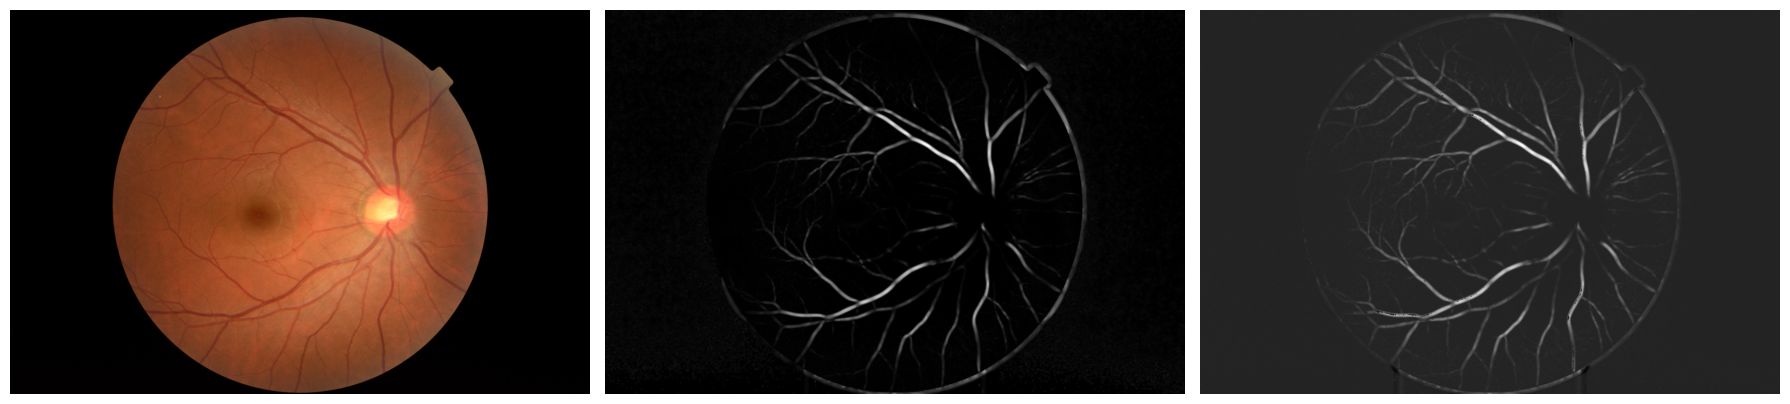

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(edges, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(subtracted_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()